In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

In [15]:
data = pd.read_csv('train_paribas.csv')
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [16]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(114321, 114)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((80024, 112), (34297, 112))

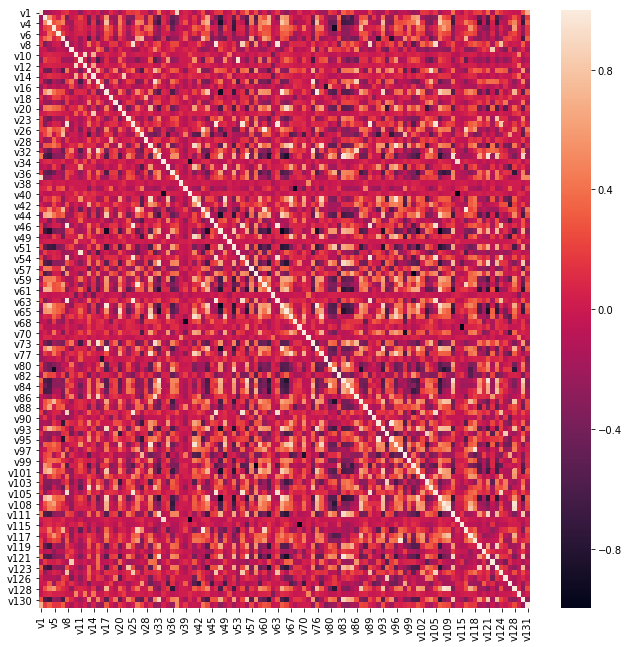

In [18]:
corr_matrix = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr_matrix)

In [19]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [20]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

55

In [21]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((80024, 57), (34297, 57))

In [22]:
data = pd.read_csv('train_paribas.csv')

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((80024, 131), (34297, 131))

In [23]:
corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() 
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,v100,v58,0.997626
1,v58,v100,0.997626
2,v69,v115,0.993510
3,v115,v69,0.993510
4,v17,v76,0.992448


In [24]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:

        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        correlated_groups.append(correlated_block)

print('Number of correlated groups found - {} out of {} total features'.format(len(correlated_groups), X_train.shape[1]))

Number of correlated groups found - 30 out of 131 total features


In [25]:
for group in correlated_groups:
    print(group)
    print()

  feature1 feature2      corr
0     v100      v58  0.997626

  feature1 feature2     corr
2      v69     v115  0.99351

    feature1 feature2      corr
4        v17      v76  0.992448
9        v17      v64  0.982326
105      v17      v48  0.910414
132      v17      v93  0.886694
178      v17     v106  0.855696
219      v17      v44  0.818748
243      v17     v101  0.801587

   feature1 feature2      corr
6       v63      v46  0.991567
12      v63      v25  0.981237
22      v63       v8  0.976189
66      v63     v105  0.940182
77      v63      v89  0.930387
90      v63      v54  0.918783

    feature1 feature2      corr
16       v60      v26  0.980879
141      v60      v43  0.876367
175      v60     v116  0.859723

    feature1 feature2      corr
20       v95      v92  0.977165
240      v95       v7  0.803270

   feature1 feature2      corr
28     v114      v40  0.967088
96     v114      v34  0.912623

    feature1 feature2      corr
30      v121      v83  0.966221
54      v121      v33

In [26]:
group = correlated_groups[2]
group

,feature1,feature2,corr
4,v17,v76,0.992448
9,v17,v64,0.982326
105,v17,v48,0.910414
132,v17,v93,0.886694
178,v17,v106,0.855696
219,v17,v44,0.818748
243,v17,v101,0.801587


In [27]:
from sklearn.ensemble import RandomForestClassifier

features = list(group.feature2.unique())+['v17']
rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=39, verbose=0, warm_start=False)

In [28]:
importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']
importance.sort_values(by='importance', ascending=False)

,feature,importance
2,v48,0.237794
6,v101,0.137001
4,v106,0.126185
1,v64,0.113062
3,v93,0.111624
7,v17,0.097736
5,v44,0.089414
0,v76,0.087184
